### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\kadia\anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import the Datasets

In [3]:
fake_df = pd.read_csv("C:/Users/kadia/Documents/CloudxLab/Capstone Project/ISOT Fake News Dataset/Fake.csv")

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df = pd.read_csv("C:/Users/kadia/Documents/CloudxLab/Capstone Project/ISOT Fake News Dataset/True.csv")

In [6]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
print("The Number of Articles in Real News dataset: ", len(true_df))
print("The Number of Articles in Fake News dataset: ", len(fake_df))

The Number of Articles in Real News dataset:  21417
The Number of Articles in Fake News dataset:  23481


### Data Exploration

In [8]:
print("Fake Dataset Columns: ", fake_df.columns)
print("True Dataset Columns: ", true_df.columns)

Fake Dataset Columns:  Index(['title', 'text', 'subject', 'date'], dtype='object')
True Dataset Columns:  Index(['title', 'text', 'subject', 'date'], dtype='object')


In [9]:
fake_df['label'] = 0
true_df['label'] = 1

In [10]:
fake_df.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [11]:
true_df.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [12]:
news_df = pd.concat([fake_df, true_df] , ignore_index=True)
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
news_df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [14]:
news_df[news_df['label'] == 0].count()

title      23481
text       23481
subject    23481
date       23481
label      23481
dtype: int64

In [15]:
print("The Number of Articles in Real News dataset: ", len(true_df['label'] == 1))
print("The Number of Articles in Fake News dataset: ", len(fake_df['label'] == 0))

The Number of Articles in Real News dataset:  21417
The Number of Articles in Fake News dataset:  23481


In [16]:
print(news_df.isna().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [17]:
news_df.label.value_counts(normalize = True)

0    0.522985
1    0.477015
Name: label, dtype: float64

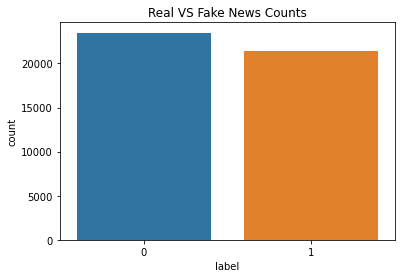

In [18]:
def create_distribution(dataFile):
    plt.figure(figsize=(6, 4)) 
    plt.title("Real VS Fake News Counts")

    return sns.countplot(x='label', data=dataFile)
create_distribution(news_df);

In [19]:
filterd_news_df = news_df.loc[:, ['title', 'text', 'subject', 'label']]
filterd_news_df.head()

,title,text,subject,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,1


### Selection of Important Features

In [20]:
filterd_news_df['train_features'] = filterd_news_df['title'] + " " + filterd_news_df['text']
filterd_news_df.head()

,title,text,subject,label,train_features
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,0,Ben Stein Calls Out 9th Circuit Court: Committ...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1,Trump drops Steve Bannon from National Securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,1,Puerto Rico expects U.S. to lift Jones Act shi...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,0,OOPS: Trump Just Accidentally Confirmed He Le...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,1,Donald Trump heads for Scotland to reopen a go...


In [22]:
filterd_news_df[['train_features', 'label']].tail()

,train_features,label
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,0
44894,PM May seeks to ease Japan's Brexit fears duri...,1
44895,Merkel: Difficult German coalition talks can r...,1
44896,Trump Stole An Idea From North Korean Propaga...,0
44897,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,0


### Data Preprocessing

In [20]:
def preprocessing_text(text):
    # Convert the entire text to lowercase
    text = text.lower()

    # Remove text within square brackets, including the brackets
    text = re.sub('\[.*?\]', '', text)

    # Replace all non-alphabetic characters with a space
    text = re.sub("\\W", " ", text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)

    return text  # Return the preprocessed text

In [21]:
filterd_news_df['train_features'] = filterd_news_df['train_features'].apply(preprocessing_text)

In [22]:
filterd_news_df['train_features'][0]

'ben stein calls out  circuit court  committed a  coup d état  against the constitution  century wire says ben stein  reputable professor from  pepperdine university  also of some hollywood fame appearing in tv shows and films such as ferris bueller s day off  made some provocative statements on judge jeanine pirro s show recently  while discussing the halt that was imposed on president trump s executive order on travel  stein referred to the judgement by the  circuit court in washington state as a  coup d tat against the executive branch and against the constitution   stein went on to call the judges in seattle  political puppets  and the judiciary  political pawns  watch the interview below for the complete statements and note the stark contrast to the rhetoric of the leftist media and pundits who neglect to note that no court has ever blocked any presidential orders in immigration in the past or discuss the legal efficacy of the halt or the actual text of the executive order read mo

### Train and Test Data Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(filterd_news_df['train_features'],
                                                   filterd_news_df['label'],
                                                   test_size = 0.3,
                                                   random_state = 42)

### Tokenization

In [24]:
vector = TfidfVectorizer()
tfidf_vector_train = vector.fit_transform(X_train)
tfidf_vector_test = vector.transform(X_test)

print('Train shape: ', tfidf_vector_train.shape)
print('Test shape: ', tfidf_vector_test.shape)

Train shape:  (31428, 93031)
Test shape:  (13470, 93031)


### Machine Learning Models are being trained on this dataset are:

1. Logistic Regression
2. Naive Bayes
3. Random Forest
4. Decision Tree
5. SVM
6. Voting Classifier
7. GradientBoosting Classifier
8. XGB Classifier
9. AdaBoost Classifier

In [25]:
models_exp = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.001, max_depth=2),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.001, max_depth = 3, use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.001)
}

In [80]:
model_accuracies = {}
confusion_matrices = []  # To store confusion matrices
model_names = []         # To store model names
model_reports = {}  # To store the classification reports for visualization
class_labels = [0, 1]  # Classes to evaluate (adjust based on your dataset)

# Iterate over the models
for model_name, model in models_exp.items():
    print(f"\nTraining {model_name}...")
    model.fit(tfidf_vector_train, y_train)  # Fit the pipeline with vectorized data
    y_pred = model.predict(tfidf_vector_test)  # Predict with the current model using vectorized test data
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, digits=6))
    
    # Generate classification report and store it
    report = classification_report(y_test, y_pred, labels=class_labels, output_dict=True, digits=6)
    model_reports[model_name] = report  # Store the report as a dictionary
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    confusion_matrices.append(cm)
    model_names.append(model_name)


Training Naive Bayes...
Naive Bayes Accuracy: 0.9362
              precision    recall  f1-score   support

           0   0.930017  0.949894  0.939850      7065
           1   0.943396  0.921155  0.932143      6405

    accuracy                       0.936229     13470
   macro avg   0.936706  0.935525  0.935997     13470
weighted avg   0.936379  0.936229  0.936185     13470


Training Logistic Regression...
Logistic Regression Accuracy: 0.9849
              precision    recall  f1-score   support

           0   0.988607  0.982590  0.985590      7065
           1   0.980924  0.987510  0.984206      6405

    accuracy                       0.984929     13470
   macro avg   0.984766  0.985050  0.984898     13470
weighted avg   0.984954  0.984929  0.984932     13470


Training Random Forest...
Random Forest Accuracy: 0.9887
              precision    recall  f1-score   support

           0   0.988137  0.990375  0.989255      7065
           1   0.989357  0.986885  0.988119      6405



### Voting Classifier


Training Voting Classifier...
Voting Classifier Accuracy: 0.9877
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7065
           1       0.99      0.98      0.99      6405

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



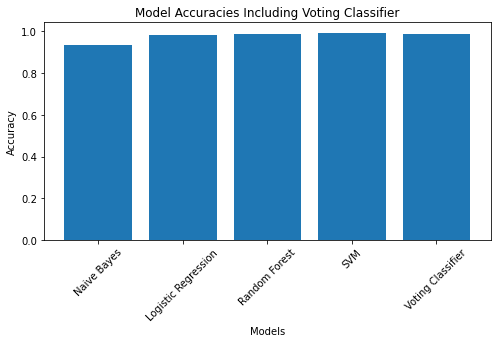

In [35]:
voting_clf = VotingClassifier(
    estimators=[
        ("Logistic Regression", models["Logistic Regression"]),
        ("Naive Bayes", models["Naive Bayes"]),
        ("SVM", models["SVM"]),
        ("Random Forest", models["Random Forest"]),
    ],
    voting="hard"
)

print("\nTraining Voting Classifier...")
voting_clf.fit(tfidf_vector_train, y_train)
voting_pred = voting_clf.predict(tfidf_vector_test)
voting_accuracy = accuracy_score(y_test, voting_pred)

model_accuracies["Voting Classifier"] = voting_accuracy
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
print(classification_report(y_test, voting_pred, , digits=6))

plt.figure(figsize=(8, 4))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies Including Voting Classifier")
plt.xticks(rotation=45)
plt.show()

### Evaluations for the Models:

1. Accuracy
2. Classification Report
3. Confusion Matrices

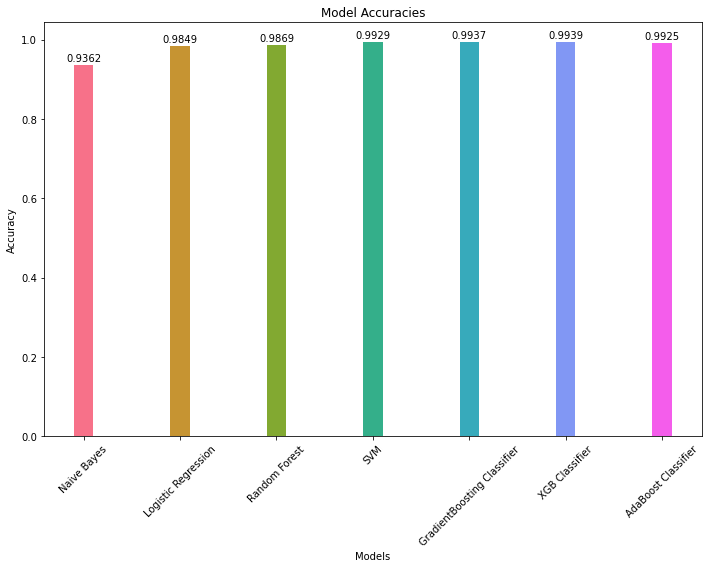

In [74]:
colors = sns.color_palette("husl", len(model_accuracies))

plt.figure(figsize=(10, 8))
plt.bar(
    model_accuracies.keys(),
    model_accuracies.values(),
    color=colors,
    width=0.2
)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)

# Annotate each bar with its accuracy value
for i, (model, accuracy) in enumerate(model_accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

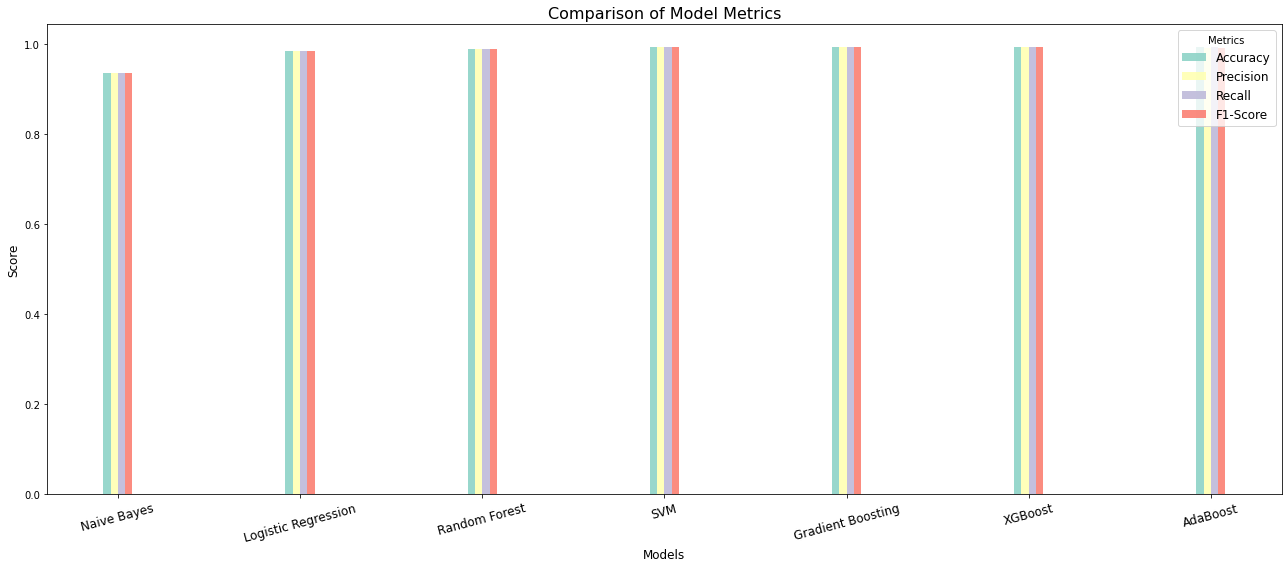

In [92]:
model_metrics = {}

for model_name, report in model_reports.items():
    accuracy = model_accuracies[model_name]
    precision = np.mean([report[str(cls)]['precision'] for cls in class_labels])
    recall = np.mean([report[str(cls)]['recall'] for cls in class_labels])
    f1_score = np.mean([report[str(cls)]['f1-score'] for cls in class_labels])
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

# Convert the metrics to a plot-friendly format
metrics_df = pd.DataFrame(model_metrics).T  # Transpose for easier plotting

# Plotting the grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(model_metrics))  # Positions for the models
bar_width = 0.04  # Width of each bar
colors = sns.color_palette("Set3", len(metrics))  # Color palette

plt.figure(figsize=(18, 8))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(
        x + i * bar_width,
        metrics_df[metric],
        width=bar_width,
        label=metric,
        color=colors[i],
        alpha=0.9
    )

# Add labels, title, and legend
plt.title("Comparison of Model Metrics", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(x + bar_width * (len(metrics) - 1) / 2, metrics_df.index, fontsize=12, rotation=15)
plt.legend(title="Metrics", fontsize=12, loc="best")

# Show the plot
plt.tight_layout()
plt.show()

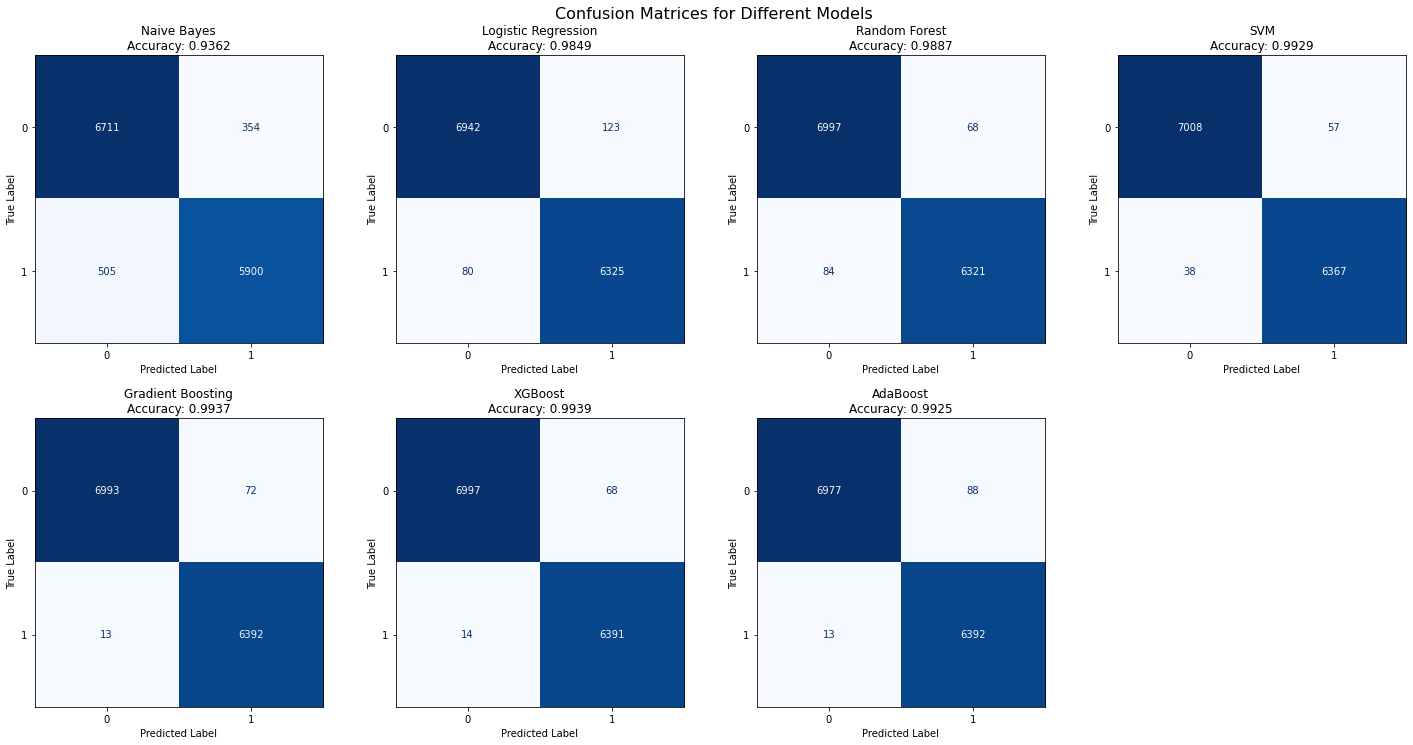

In [82]:
# Assume `confusion_matrices` is a list of confusion matrices, and `model_names` is a list of model names
n_models = len(confusion_matrices)
n_cols = 4  # Number of columns in the grid
n_rows = int(np.ceil(n_models / n_cols))  # Number of rows

# Set up the figure
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(5 * n_cols, 5 * n_rows),
    constrained_layout=True
)

# Flatten axes for easy iteration (handles cases with fewer models than grid cells)
axes = axes.flatten()

# Plot each confusion matrix
for i, (cm, model_name) in enumerate(zip(confusion_matrices, model_names)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title(f"{model_name}\nAccuracy: {model_accuracies[model_name]:.4f}", fontsize=12)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global title
plt.suptitle("Confusion Matrices for Different Models", fontsize=16, y=1.02)
plt.show()